In [1]:
import pandas as pd
import os
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.labelweight'] = 'bold'

# %% Defining Functions
def plot_freq(dataset):
    event_dates = {'1':('2000-09-20','UK fuel protests'),
                   '2':('2002-04-24','Failed Venezuelan coup'),
                   '3':('2015-10-14','Volkswagen emissions scandal'),
                   '4':('2002-02-13','Post-bankruptcy Enron hearings'),
                   '5':('2005-09-21','Hurricane Katrina'),
                   '6':None,
                   '7':('2010-06-02','BP oil spill aftermath')}
    # Arrange the plotting order of topics
    topic_name_dict={'1':'Co','2':'Gom','3':'Env','4':'Epg',
                     '5':'Bbl','6':'Rpc','7':'Ep'}
    # Get title of each topic
    topic_title_dict={'Co':'Company (Co)', 'Gom':'Global Oil Market (Gom)', 'Env':'Environment (Env)',
                      'Bbl':'Crude Oil Physical (Bbl)','Rpc':'Refining & Pertrochemicals (Rpc)',
                      'Ep':'Exploration & Production (Ep)','Epg':'Energy/Power Generation (Epg)'}
    # ytick dict by topic
    topic_ytick_dict={'Co':[0,0.1,0.2,0.3,0.4], 'Gom':[0,0.1,0.2,0.3,0.4,0.5,0.6], 'Env':[0,0.05,0.1,0.15],
                      'Bbl':[0,0.05,0.1],'Rpc':[0,0.01,0.02,0.03,0.04],
                      'Ep':[0,0.05,0.1,0.15],'Epg':[0.2,0.3,0.4,0.5]}
    # i,j to adjust plotting position
    i=0;j=0
    fig,axe=plt.subplots(4,2,figsize=(16,20),dpi=200)
    for k in range(7):
        i=int(k/2)
        j=k%2
        # get topic name
        topic = topic_name_dict[str(k+1)]
        # get topic title
        topic_title=topic_title_dict[topic]
        axe[i,j].plot(dataset['date'], dataset['ftopic'+str(k+1)+'_4wk'],color='b')
        # turn off the axis
        # set title and take care of fontsize, color as well as padding
        axe[i,j].set_title(topic_title,fontsize=20,color='black',pad=25,fontweight='bold')
        axe[i,j].set_xlim(dataset['date'].values[0],dataset['date'].values[-1])
        axe[i,j].set_yticks(topic_ytick_dict[topic])
        axe[i,j].set_yticklabels(topic_ytick_dict[topic], fontsize=15)
        xtick,_=plt.xticks()
        axe[i,j].set_xticklabels((1996, 2000,2004,2008,2012,2016,2020),fontsize=15)
        if event_dates[str(k+1)] != None:
            event_date = event_dates[str(k+1)][0]
            axe[i,j].plot(datetime.strptime(event_date,'%Y-%m-%d'),
                    dataset.loc[dataset.date_Wed == event_date,'ftopic'+str(k+1)+'_4wk'],
                    marker='*',color='red',markersize=16)
    # do not forget disguise the last plot
    axe[3,1].axis('off')
    fig.suptitle('Panel A: Topical Frequency', fontsize=30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    # adjust the position between subplots
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    plt.savefig('Fig2_1.pdf')
    
def plot_sent(dataset):
    event_dates = {'1':('2000-09-20','UK fuel protests'),
                   '2':('2002-04-24','Failed Venezuelan coup'),
                   '3':('2015-10-14','Volkswagen emissions scandal'),
                   '4':('2002-02-13','Post-bankruptcy Enron hearings'),
                   '5':('2005-09-21','Hurricane Katrina'),
                   '6':None,
                   '7':('2010-06-02','BP oil spill aftermath')}
    # Arrange the plotting order of topics
    topic_name_dict={'1':'Co','2':'Gom','3':'Env','4':'Epg',
                     '5':'Bbl','6':'Rpc','7':'Ep'}
    # Get title of each topic
    topic_title_dict={'Co':'Company (Co)', 'Gom':'Global Oil Market (Gom)', 'Env':'Environment (Env)',
                      'Bbl':'Crude Oil Physical (Bbl)','Rpc':'Refining & Pertrochemicals (Rpc)',
                      'Ep':'Exploration & Production (Ep)','Epg':'Energy/Power Generation (Epg)'}
    # ytick dict by topic
    topic_ytick_dict={'Co':[0,-1,-2,-3], 'Gom':[0,-5,-10,-15], 'Env':[0,-1,-2,-3],
                      'Bbl':[0,-0.5,-1,-1.5],'Rpc':[0,-0.5,-1],
                      'Ep':[0,-.5,-1,-1.5,-2,-2.5],'Epg':[0,-5,-10,-15]}
    # y position of the scale annotation (\times 10^{-3})
    annotation_y_dict={'Co':0.1, 'Gom':0.24, 'Env':0.18,
                      'Bbl':0.05,'Rpc':0.06,
                      'Ep':0.1,'Epg':0.26}
    # i,j to adjust plotting position
    i=0;j=0
    fig,axe=plt.subplots(4,2,figsize=(16,20),dpi=200)
    for k in range(7):
        i=int(k/2)
        j=k%2
        # get topic name
        topic = topic_name_dict[str(k+1)]
        # get topic title
        topic_title=topic_title_dict[topic]
        
        axe[i,j].plot(dataset['date'], 1000*dataset['stopic'+str(k+1)+'_4wk'],color='b')
        # turn off the axis
        # set title and take care of fontsize, color as well as padding
        axe[i,j].set_title(topic_title,fontsize=20,color='black',pad=25,fontweight='bold')
        axe[i,j].set_xlim(dataset['date'].values[0],dataset['date'].values[-1])
        axe[i,j].set_yticks(topic_ytick_dict[topic])
        axe[i,j].set_yticklabels(topic_ytick_dict[topic], fontsize=15)
        xtick,_=plt.xticks()
        axe[i,j].text(pd.Timestamp('1998-05-01'),annotation_y_dict[topic],r'$\times 10^{-3}$',fontsize=12)
        axe[i,j].set_xticklabels((1996,2000,2004,2008,2012,2016,2020),fontsize=15)
        if event_dates[str(k+1)] != None:
            event_date = event_dates[str(k+1)][0]
            axe[i,j].plot(datetime.strptime(event_date,'%Y-%m-%d'),
                    1000*dataset.loc[dataset.date_Wed == event_date,'stopic'+str(k+1)+'_4wk'],
                    marker='*',color='red',markersize=16)
    # do not forget disguise the last plot
    axe[3,1].axis('off')
    fig.suptitle('Panel B: Topical Sentiment', fontsize=30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    # adjust the position between subplots
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    plt.savefig('Fig2_2.pdf')

def plot_others(dataset):
    # Arrange the plotting order of topics
    topic_name_dict={'1':'artcount_4wk','2':'entropy_4wk','3':'PCAsent','4':'PCAfreq',
                     '5':'PCAall'}
    # Get title of each topic
    topic_title_dict={'artcount_4wk':'Article Counts', 'entropy_4wk':'Entropy', 'PCAsent':'First PC of Normalized Topical Sentimant',
                      'PCAfreq':'First PC of Normalized Topical Frequency','PCAall':'First PC of Normalized all Text Variables'}
    # ytick dict by topic
    topic_ytick_dict={'artcount_4wk':[0,150,300,450,600,750], 'entropy_4wk':[1.8,2.0,2.2,2.4], 'PCAsent':[-4,-2,0,2,4],
                      'PCAfreq':[-4,-2,0,2,4],'PCAall':[-6,-3,0,3,6]}
    # i,j to adjust plotting position
    i=0;j=0
    fig,axe=plt.subplots(3,2,figsize=(16,15),dpi=200)
    for k in range(5):
        i=int(k/2)
        j=k%2
        # get topic name
        topic = topic_name_dict[str(k+1)]
        # get topic title
        topic_title=topic_title_dict[topic]
        
        axe[i,j].plot(dataset['date'], dataset[topic_name_dict[str(k+1)]],color='b')
        # turn off the axis
        # set title and take care of fontsize, color as well as padding
        axe[i,j].set_title(topic_title,fontsize=20,color='black',pad=25,fontweight='bold')
        axe[i,j].set_xlim(dataset['date'].values[0],dataset['date'].values[-1])
        axe[i,j].set_yticks(topic_ytick_dict[topic])
        axe[i,j].set_yticklabels(topic_ytick_dict[topic], fontsize=15)
        xtick,_=plt.xticks()
        axe[i,j].set_xticklabels((1996,2000,2004,2008,2012,2016,2020),fontsize=15)
    # do not forget disguise the last plot
    axe[2,1].axis('off')
    fig.suptitle('Panel C: Article Counts, Unusualness and PCA series', fontsize=30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    # adjust the position between subplots
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    plt.savefig('Fig2_3.pdf')



# mod

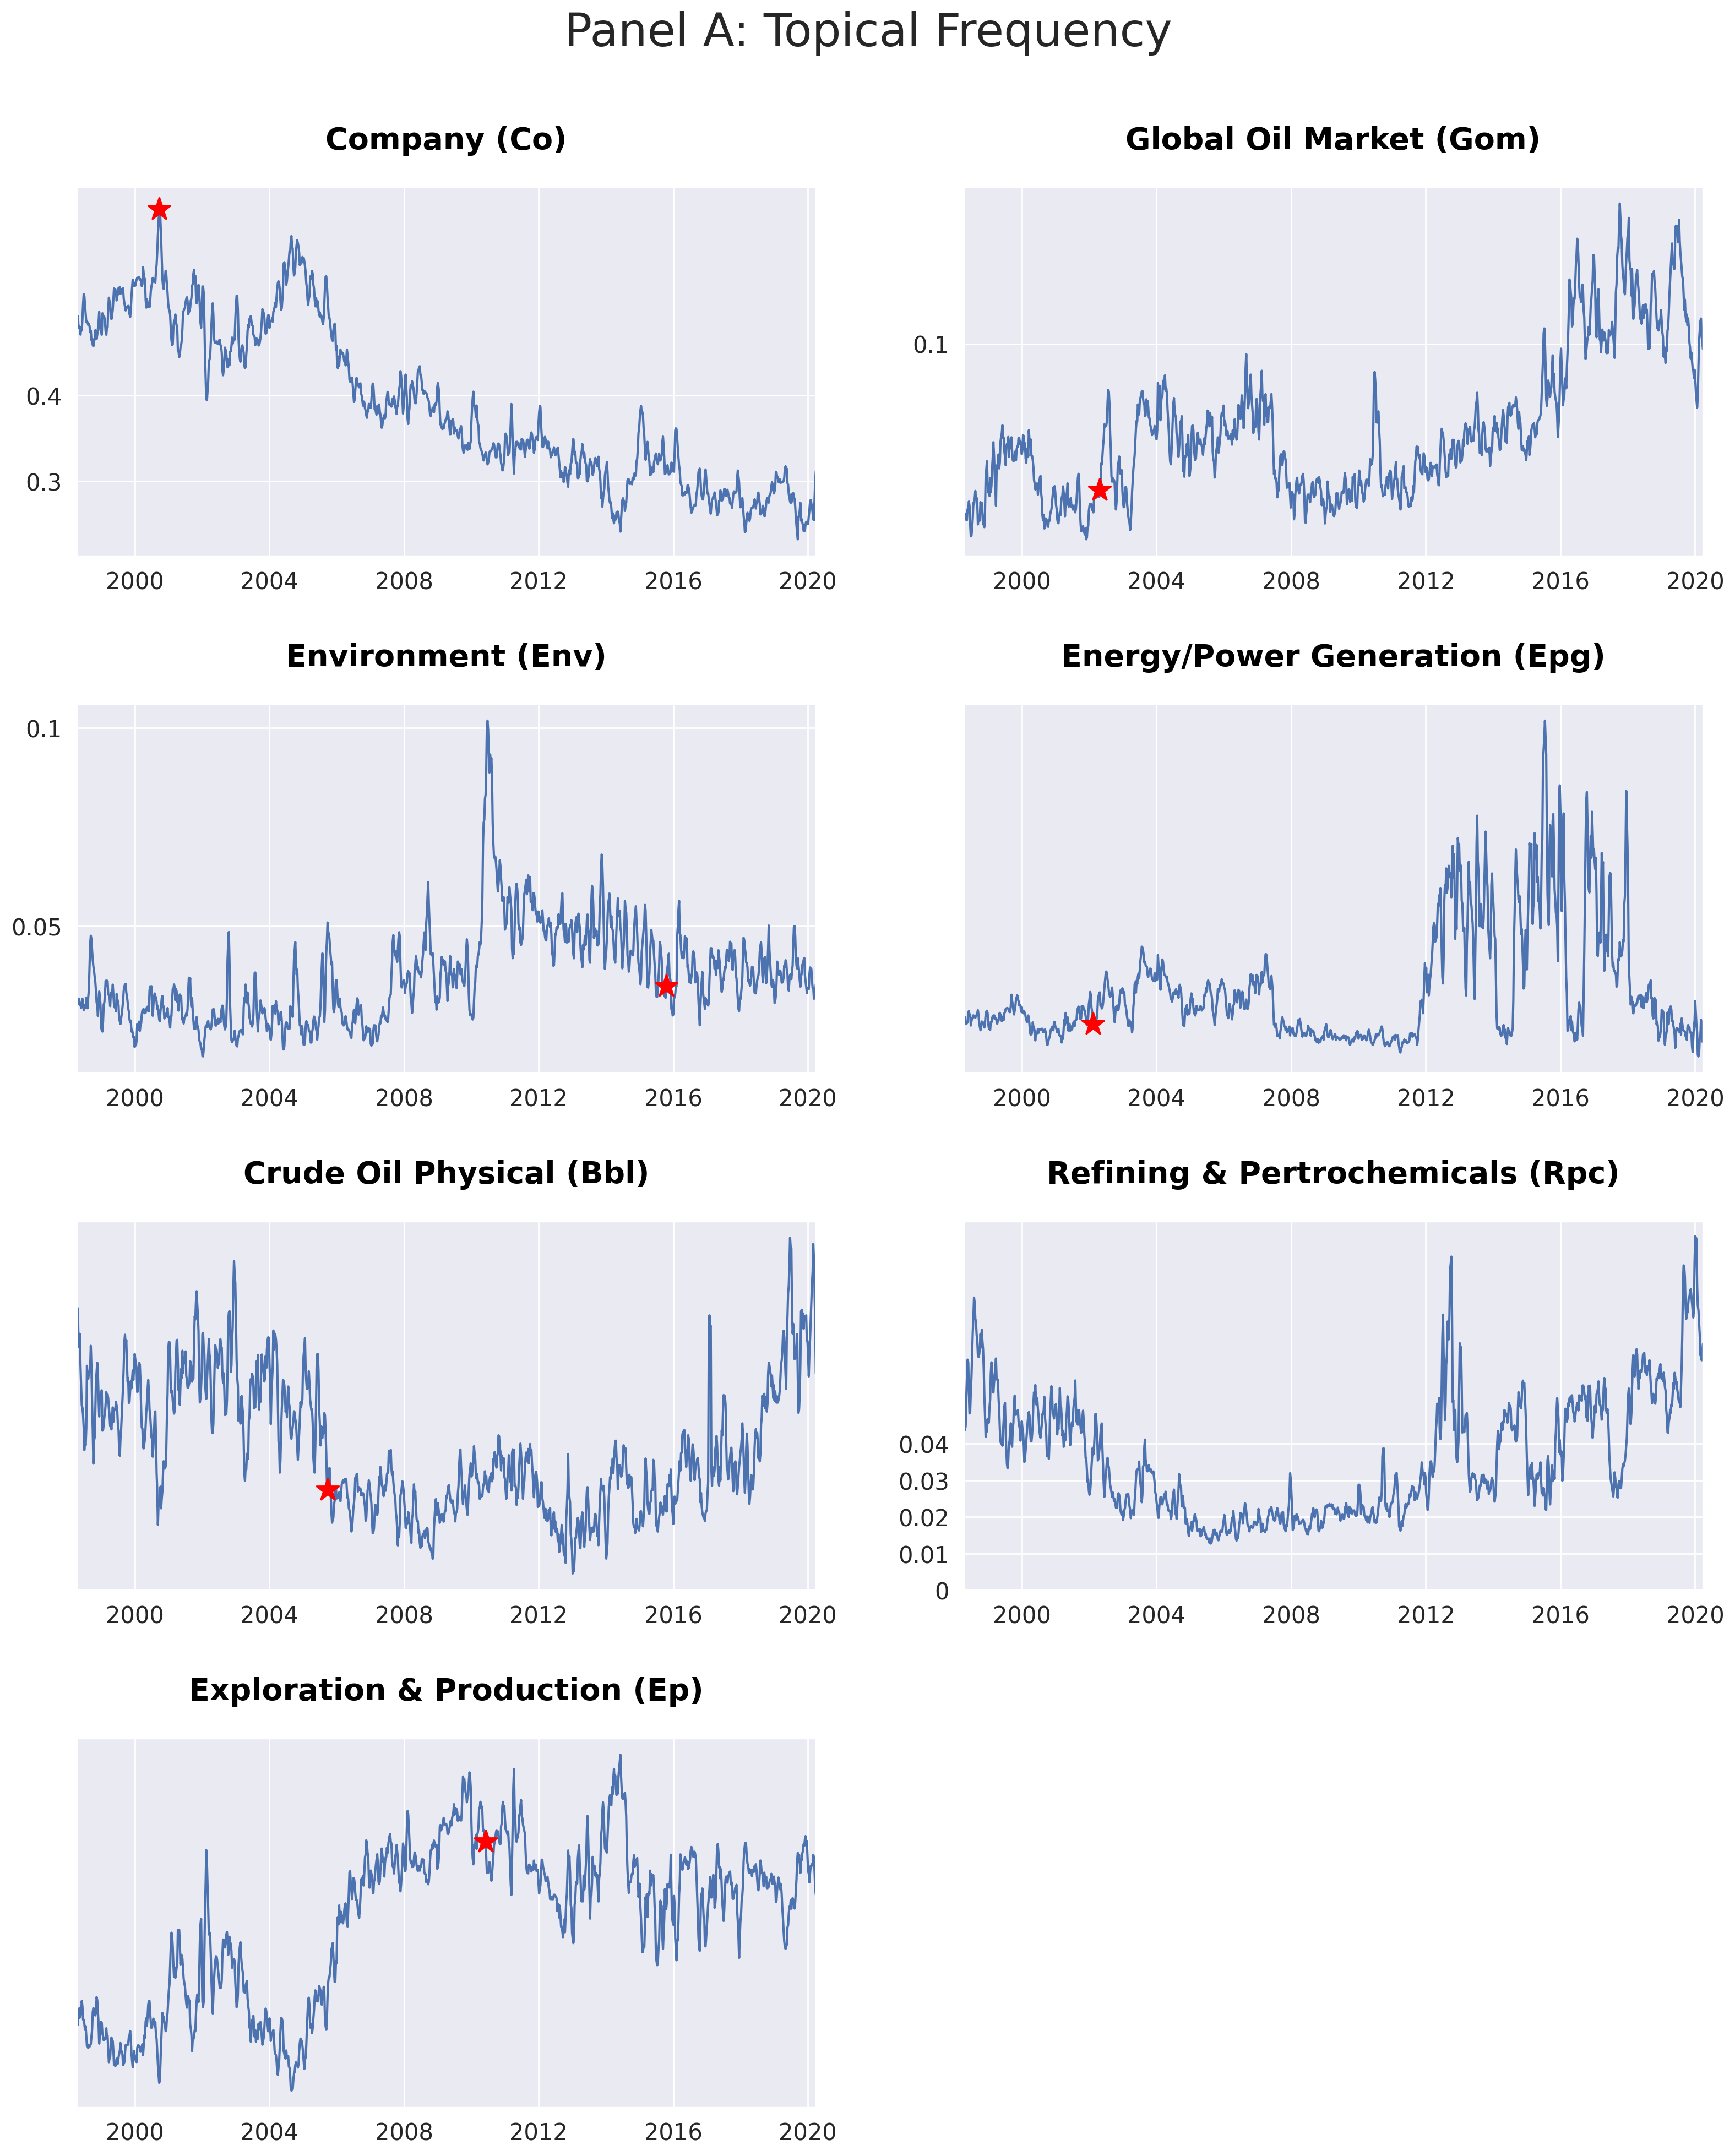

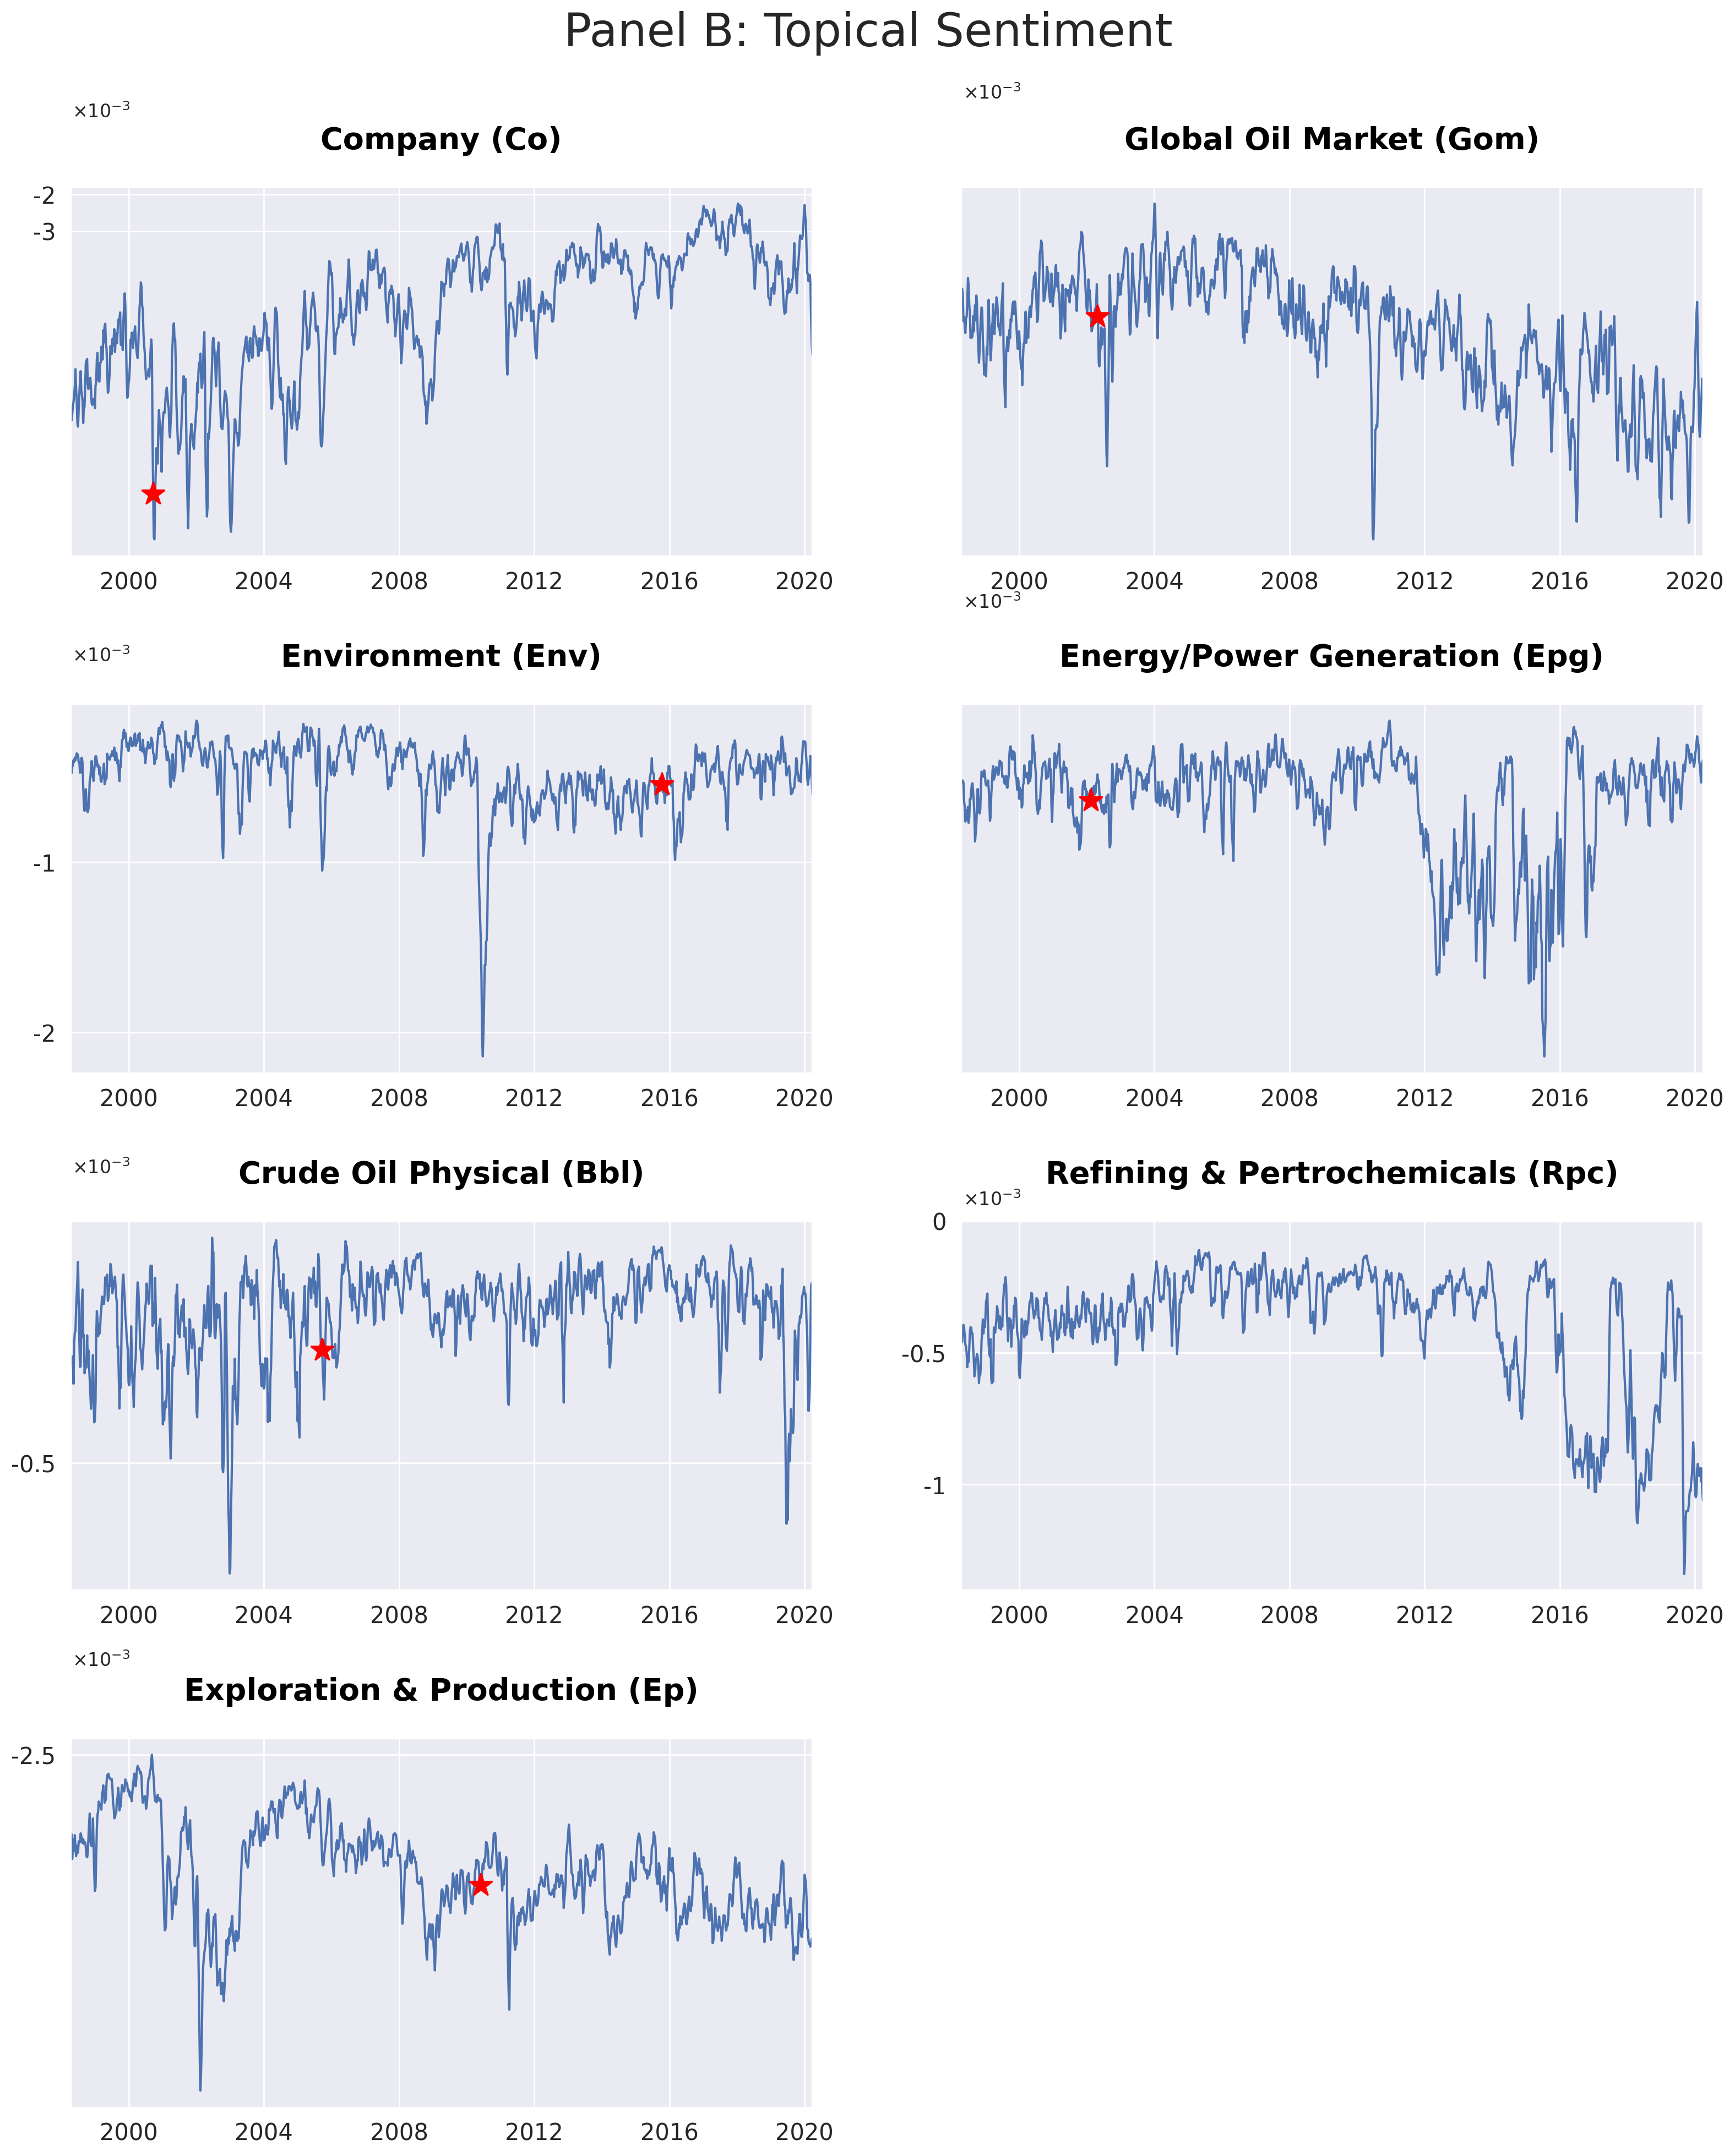

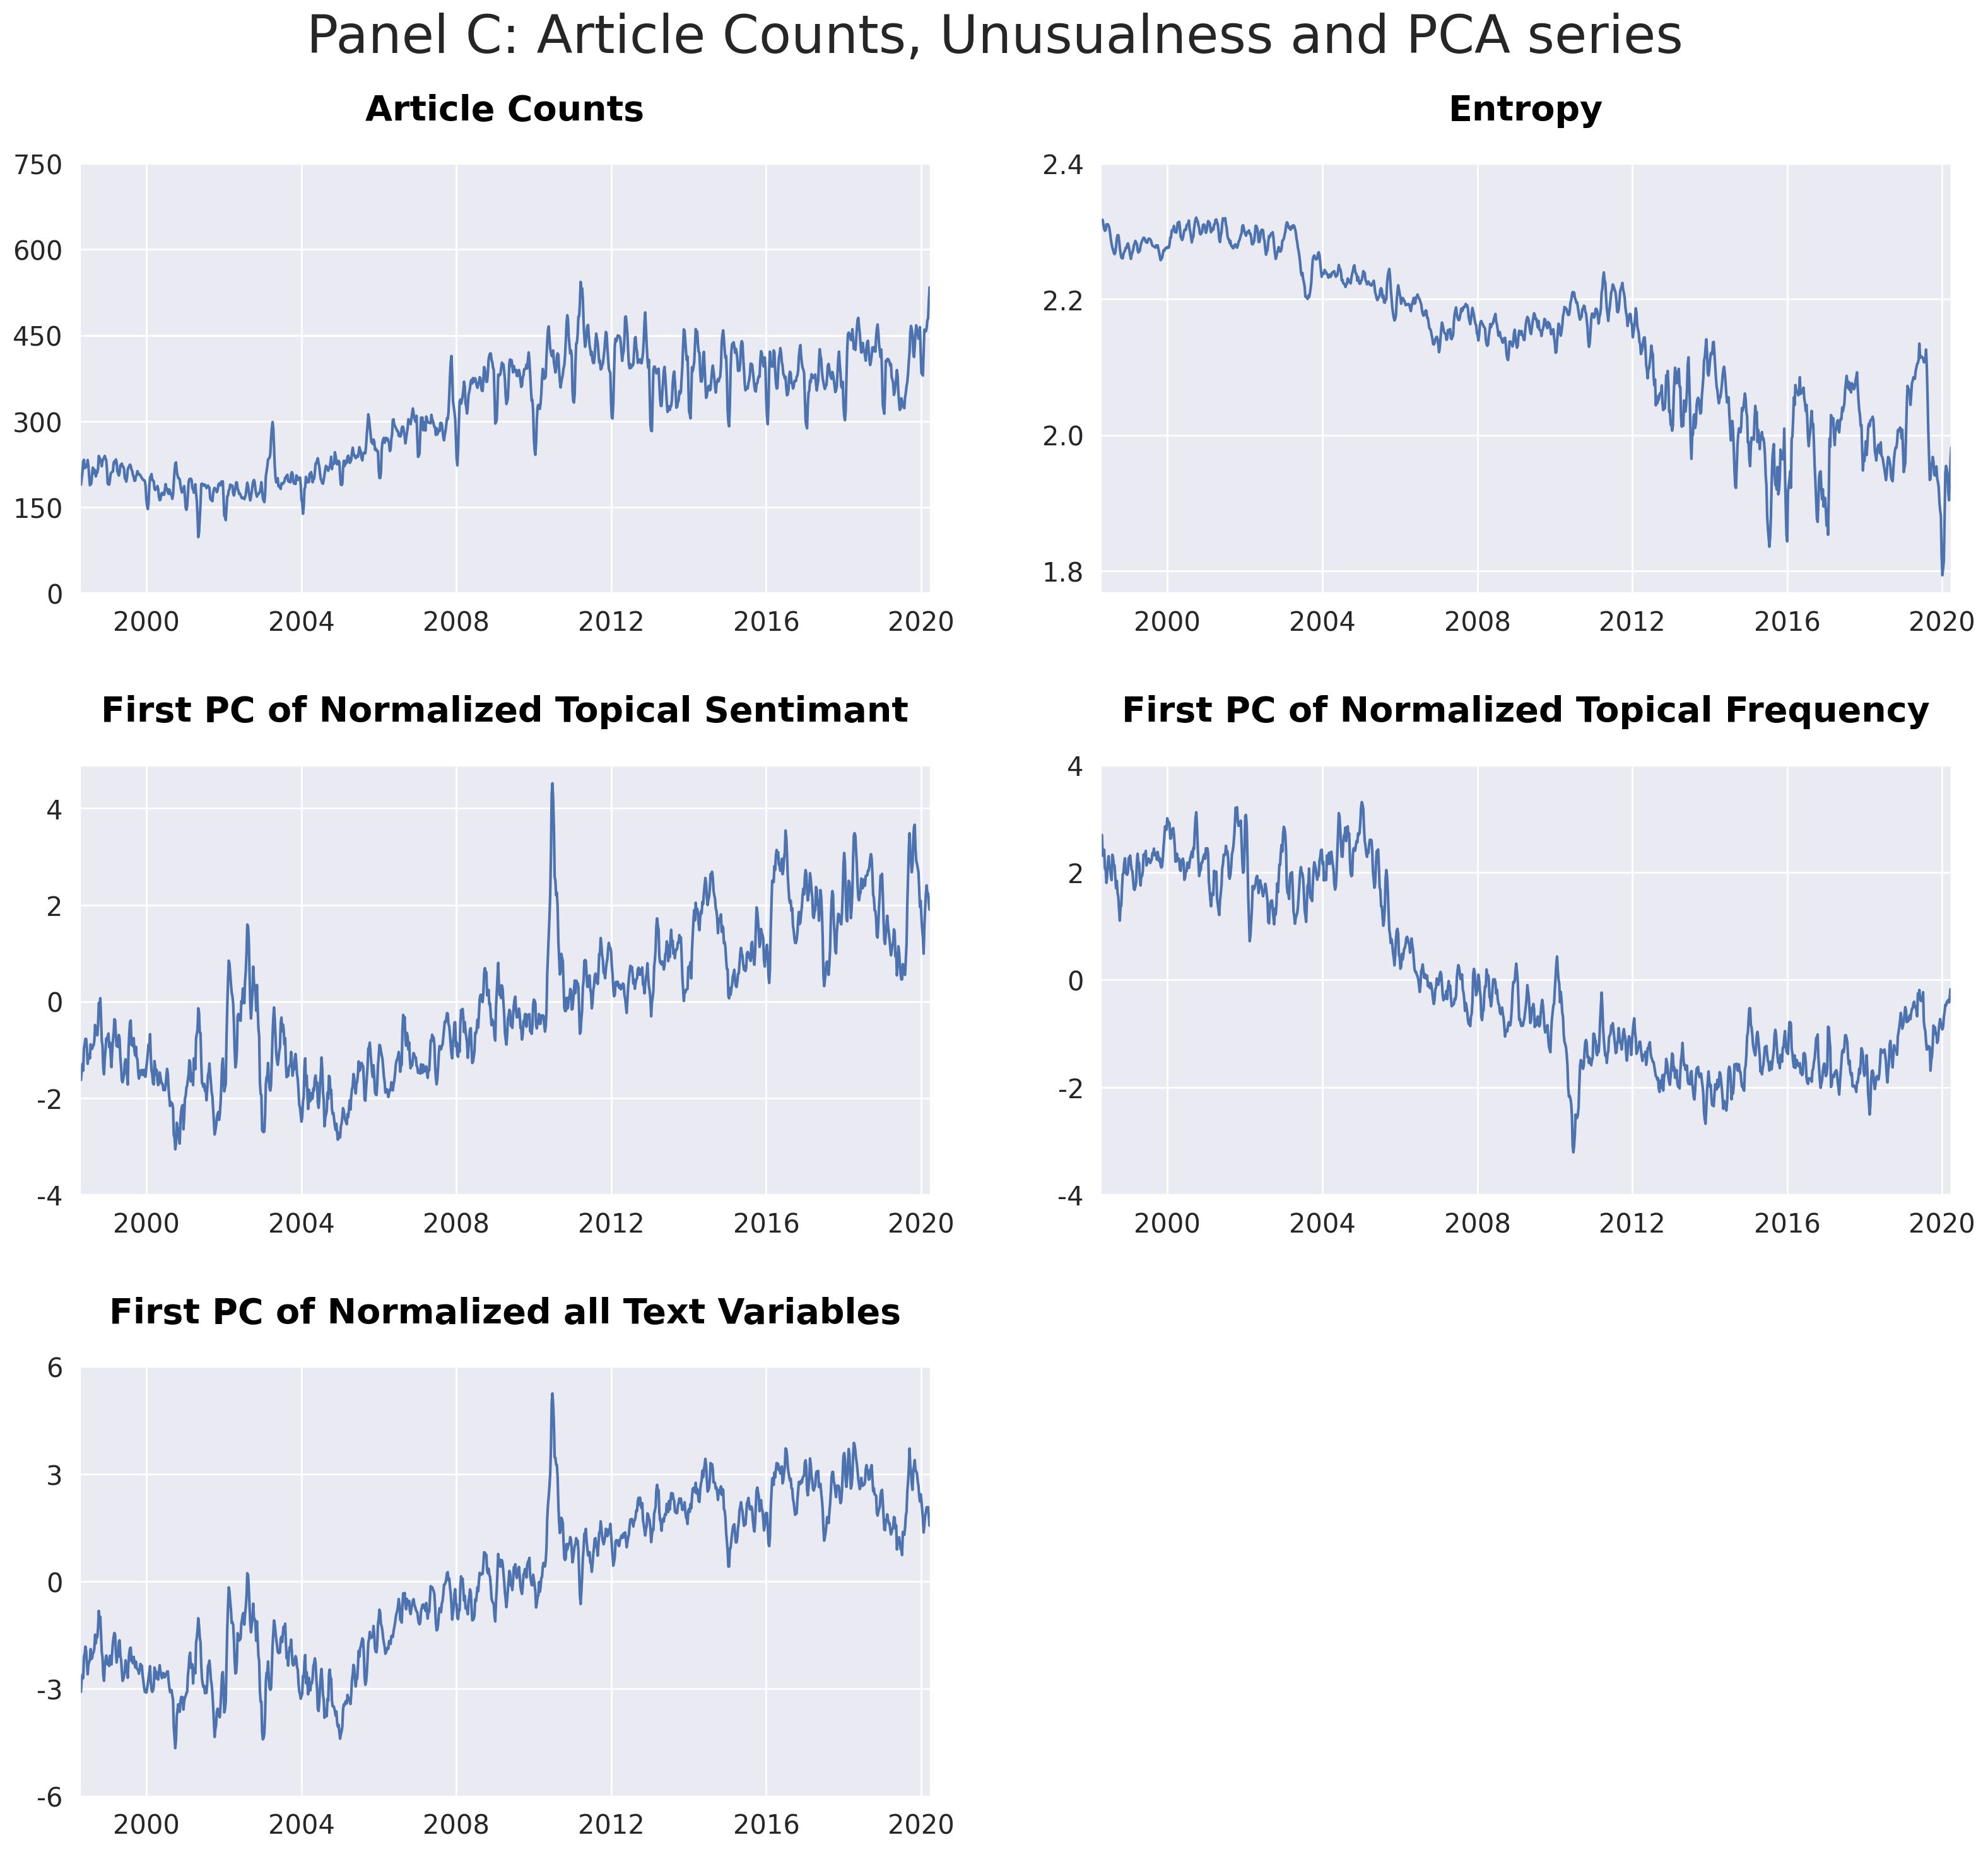

In [2]:
# read the latest dataset
dataset = pd.read_stata('transformed_data_prices_v19.2_mod.dta')
date_cols_price = [x for x in list(dataset.columns.values) if 'date' in x]
dataset = dataset.rename(columns={x:'_'.join(x.split('_')[:-1]) for x in set(dataset.columns.values) if x not in date_cols_price})

# remedy missing var in in-sample analysis
dataset = dataset.rename(columns={'date_Fri':'date'})
# remedy missing var in in-sample analysis
dataset['sent'] = dataset['sCo']+dataset['sGom']+dataset['sEnv']\
                 +dataset['sEpg']+dataset['sBbl']+dataset['sRpc']+dataset['sEp']

plot_freq(dataset)
plot_sent(dataset)
plot_others(dataset)

# acc

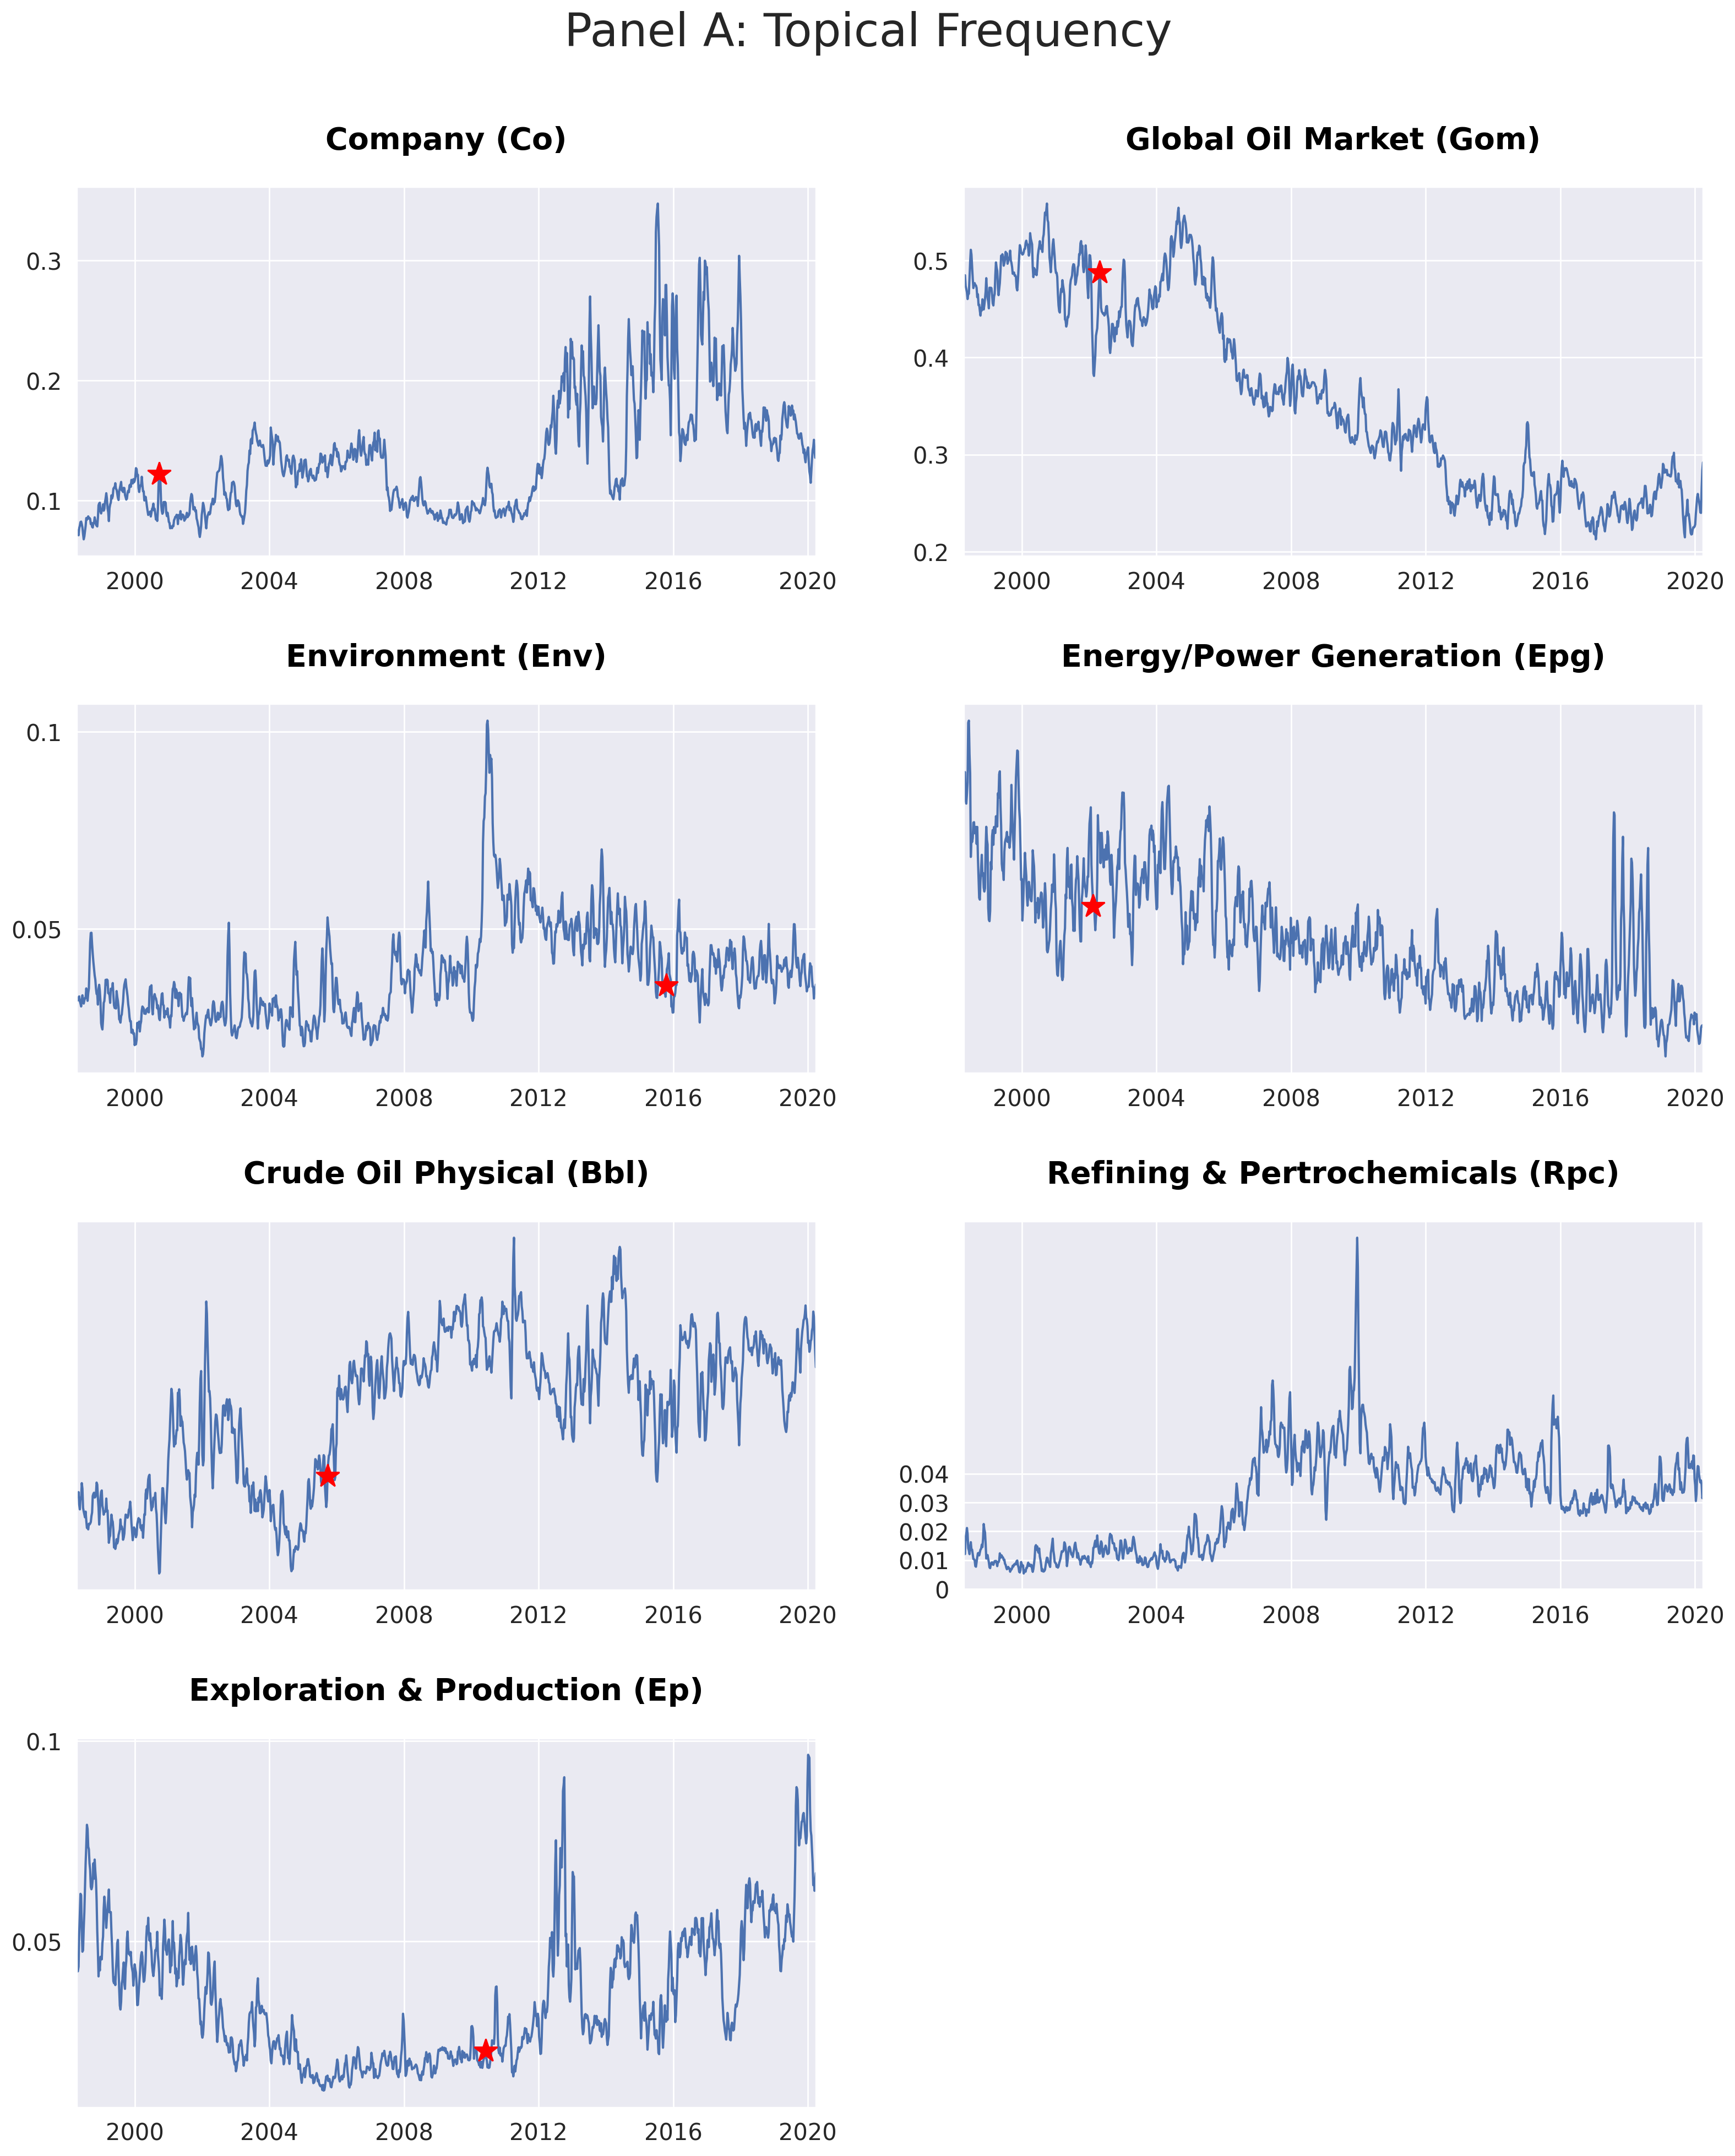

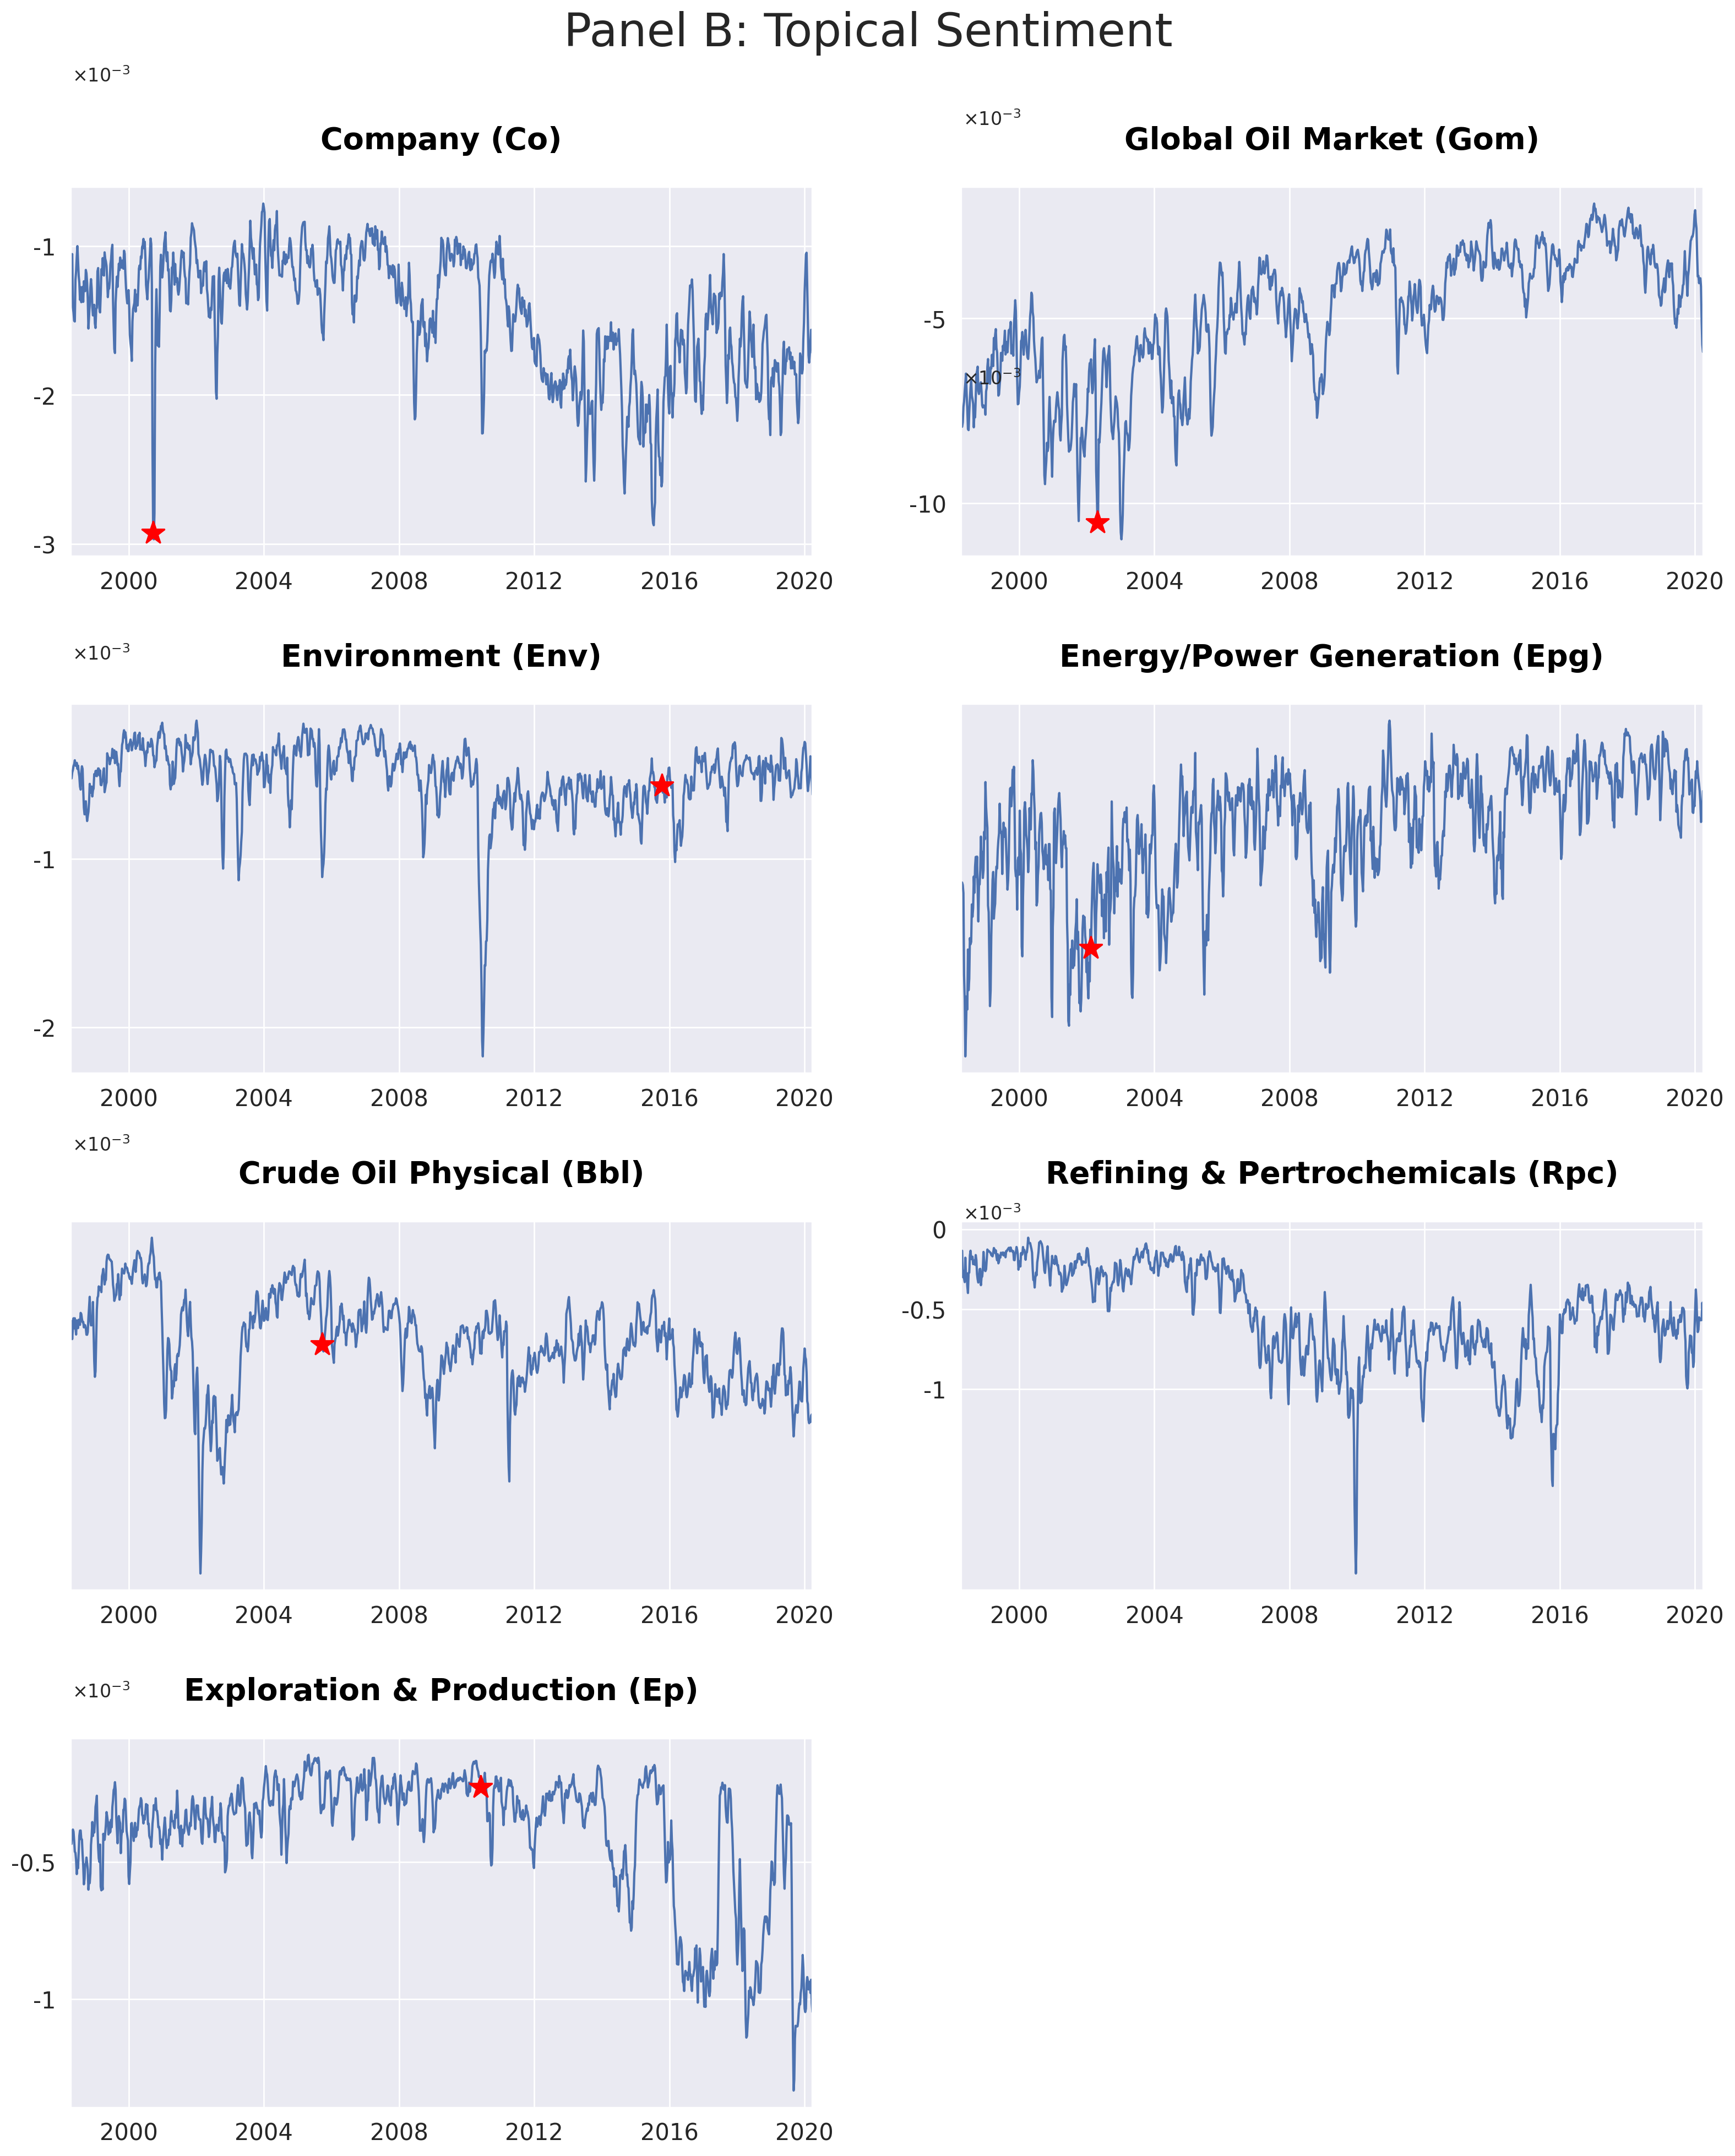

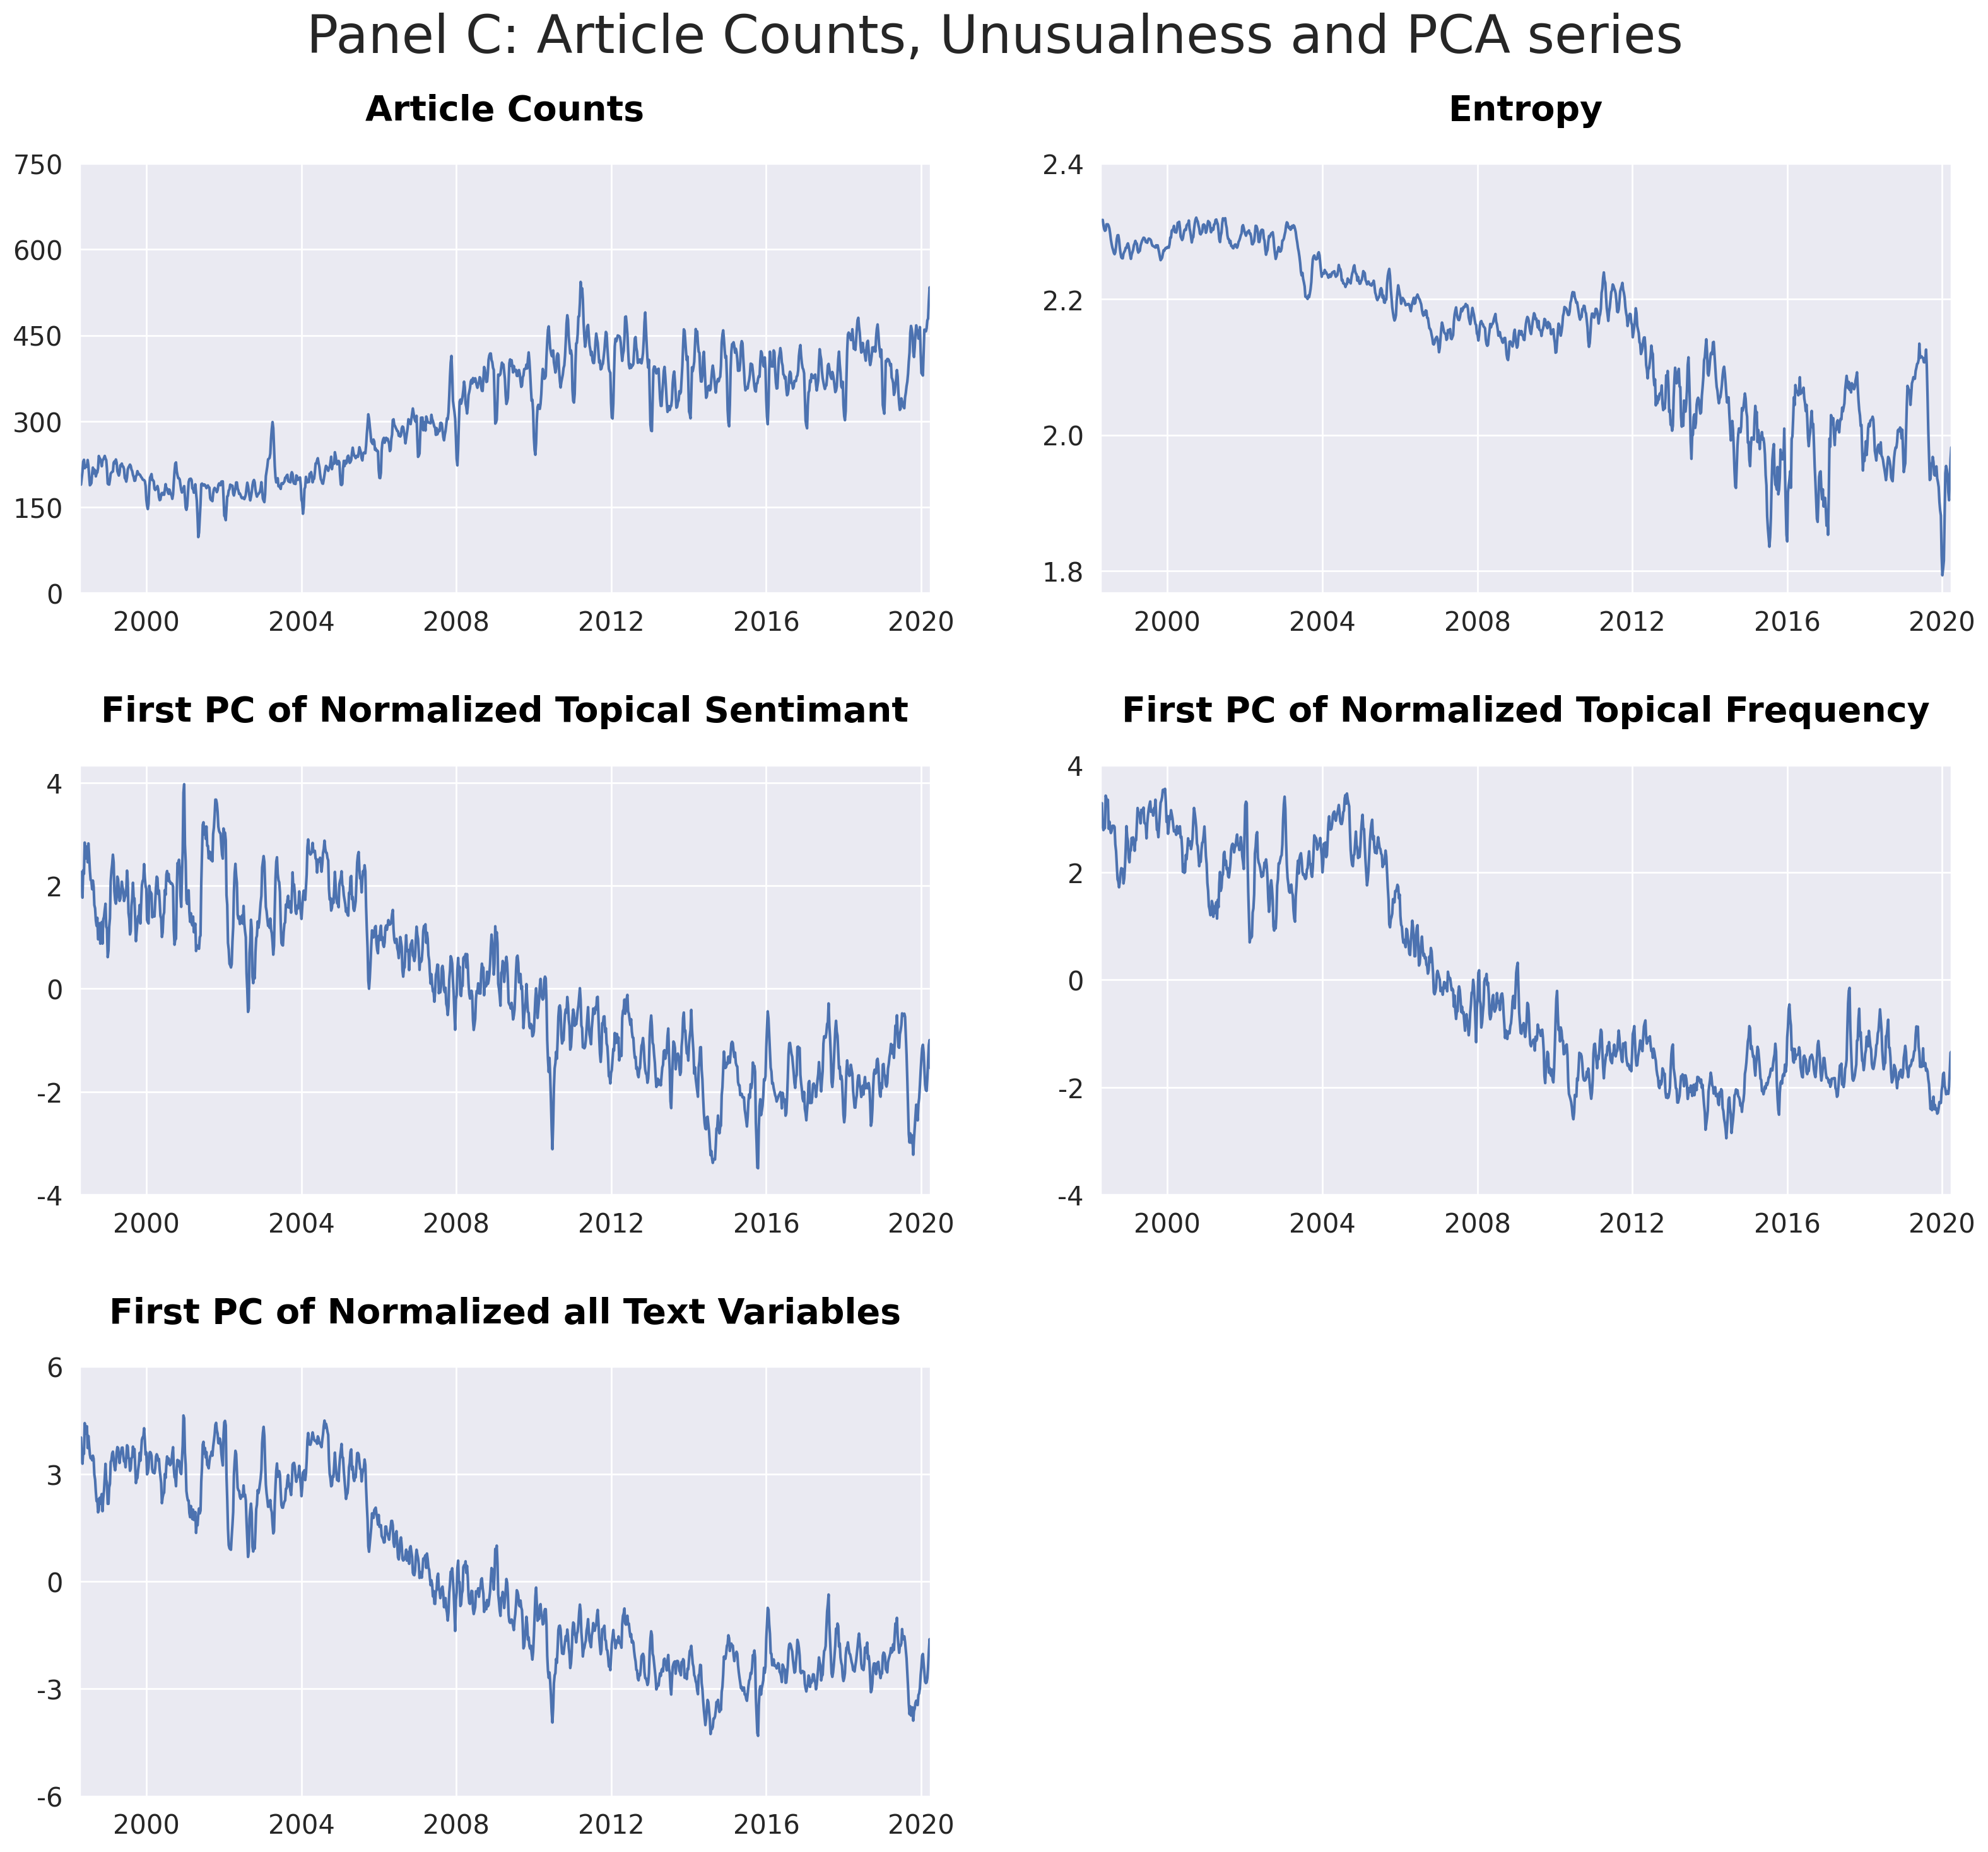

In [3]:
# read the latest dataset
dataset = pd.read_stata('transformed_data_prices_v19.2_acc.dta')
date_cols_price = [x for x in list(dataset.columns.values) if 'date' in x]
dataset = dataset.rename(columns={x:'_'.join(x.split('_')[:-1]) for x in set(dataset.columns.values) if x not in date_cols_price})

# remedy missing var in in-sample analysis
dataset = dataset.rename(columns={'date_Fri':'date'})
# remedy missing var in in-sample analysis
dataset['sent'] = dataset['sCo']+dataset['sGom']+dataset['sEnv']\
                 +dataset['sEpg']+dataset['sBbl']+dataset['sRpc']+dataset['sEp']

plot_freq(dataset)
plot_sent(dataset)
plot_others(dataset)